CS456 Datamining Final Project
Group 2

The following is an analysis of steam games data provided fom Kaggle.
We will start by importing pandas and numpy. We will also create our main dataframe object.

In [1]:
#Import Statements
import pandas as pd
import numpy as np

#Create Dataframe from CSV
df = pd.read_csv("games.csv")

#Display first 5 rows and dataframe info
print(df.head(5))
print(df.info())


                         AppID          Name Release date  Estimated owners  \
20200         Galactic Bowling  Oct 21, 2008    0 - 20000                 0   
655370            Train Bandit  Oct 12, 2017    0 - 20000                 0   
1732930           Jolt Project  Nov 17, 2021    0 - 20000                 0   
1355720               Henosis™  Jul 23, 2020    0 - 20000                 0   
1139950  Two Weeks in Painland   Feb 3, 2020    0 - 20000                 0   

         Peak CCU  Required age  Price  DiscountDLC count  \
20200           0         19.99      0                  0   
655370          0          0.99      0                  0   
1732930         0          4.99      0                  0   
1355720         0          5.99      0                  0   
1139950         0          0.00      0                  0   

                                            About the game  \
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a s

We can see here the first 5 rows of the dataframe, and some useful info: datatypes, memory usage, ect. 
Next, we will check for duplicates and missing values:

In [2]:
#Print column names
print("Columns in this dataset:")
print(df.columns)

#Check for duplicates and missing values; start with app IDs if they exist
if "AppID" in df.columns:
    dup_count = df.duplicated(subset="AppID").sum()
    print(f"\nDuplicate AppID rows: {dup_count}")

#If no AppID column, check for fully duplicate rows
else:
    dup_count = df.duplicated().sum()
    print(f"\nDuplicate rows: {dup_count}")

#Show missing values per column 
print("\nTop missing values per column:")

#Make a different dataframe to summarize missing values
missing_summary = df.isna().sum().sort_values(ascending=False)

#Print the missing values dataframe head
print(missing_summary.head(20))


Columns in this dataset:
Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

Duplicate AppID rows: 1126

Top missing values per column:
Score rank          111408
Metacritic url      107447
Reviews             100828
Notes                93003
Website              64994
Support url          60693
Tags                 37423
Support email        19025
Movies 

We observe that we have alot of columns in this steam games dataset. Our output says we have 1,126 duplicate rows by just appID alone. We made a temporary dataframe to show our top missing values per column. As you can see, ['Score rank'] is at the top of the list. Fortunately however, the following values are never missing in the dataframe: Price, Estimated owners, and Release date.

We will proceed by removing rows with duplicate appIDs from our main dataframe (not the temporary one for missing values):

In [3]:
#Print dataframe shape BEFORE removing duplicate rows
print("Shape before duplicate row removal:", df.shape)

#Drop duplicate rows based on AppID
df.drop_duplicates(subset="AppID", inplace=True)

#Reset the index after dropping duplicate rows
df.reset_index(drop=True, inplace=True)

#Print dataframe shape AFTER removing duplicate rows
print("Shape after duplicate row removal:", df.shape)


Shape before duplicate row removal: (111452, 39)
Shape after duplicate row removal: (110326, 39)


We can see after removing the rows with duplicate AppIDs that we have 110,326 rows and still 39 columns. This means we dropped 1,126 rows that had duplicate AppIDs. When you do the math, this is only about 1% of our total data, but still great for cleaning up! Next we will clean the 'Release Date' column.

In [4]:
#After doing some testing I found that the "Release date" column is incorrectly labeled and actually contains owner range data. Fixed it. 
#Rename the incorrectly-labeled release date column to owner range
df.rename(columns={"Release date": "Owner range"}, inplace=True)
print("Column renamed. 'Release year' removed.")
print(df.columns)


Column renamed. 'Release year' removed.
Index(['AppID', 'Name', 'Owner range', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


More dataframe cleaning:

In [5]:
#Show missing values before cleaning
print("Missing values BEFORE cleaning:")
print(df.isna().sum().head(20))

#Fill missing numeric columns with 0 or the median
numeric_cols = [
    "Price", 
    "Reviews",
    "Positive", 
    "Negative", 
    "User score",
    "Average playtime forever",
    "Average playtime two weeks",
    "Median playtime forever",
    "Median playtime two weeks"
]

# Loop through numeric columns and fill missing values correctly
for col in numeric_cols:
    if col in df.columns:
        # Convert to numeric so median() won't fail
        df[col] = pd.to_numeric(df[col], errors="coerce")
        
        # Compute median
        median_val = df[col].median()
        
        # If the median is NaN (column entirely NaN), use 0
        if pd.isna(median_val):
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna(median_val)

#Fill missing text fields with empty string
text_cols = [
    "Genres", "Tags", "About the game", "Developers",
    "Publishers", "Categories", "Supported languages",
    "Full audio languages"
]

#loop through text columns and fill the missing values
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("")

#Show first 20 columns' missing values after cleaning
print("\nMissing values AFTER cleaning:")
print(df.isna().sum().head(20))


Missing values BEFORE cleaning:
AppID                       1
Name                        0
Owner range                 0
Estimated owners            0
Peak CCU                    0
Required age                0
Price                       0
DiscountDLC count           0
About the game           6460
Supported languages         0
Full audio languages        0
Reviews                 99780
Header image                0
Website                 64264
Support url             60028
Support email           18809
Windows                     0
Mac                         0
Linux                       0
Metacritic score            0
dtype: int64

Missing values AFTER cleaning:
AppID                       1
Name                        0
Owner range                 0
Estimated owners            0
Peak CCU                    0
Required age                0
Price                       0
DiscountDLC count           0
About the game              0
Supported languages         0
Full audio languages   

c:\Users\asolo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Alright, this helped us clean up and populate missing stuff. This also helped us confirm some data types, because this data set is kind of messy. Next we'll make some of the genre tags into Python LISTS instead of raw strings for our genres. We'll need it like this for making predictions regarding game genre.

In [6]:
#This was a pain to figure out lol
#Remove brackets and quotes
df["Genres"] = df["Genres"].fillna("").astype(str).str.replace(r"[\[\]']", "", regex=True)
df["Tags"]   = df["Tags"].fillna("").astype(str).str.replace(r"[\[\]']", "", regex=True)

#Split on commas to convert into lists
df["Genres"] = df["Genres"].str.split(",")
df["Tags"]   = df["Tags"].str.split(",")

#Strip whitespace and remove empty strings
df["Genres"] = df["Genres"].apply(lambda lst: [x.strip() for x in lst if x.strip() != ""])
df["Tags"]   = df["Tags"].apply(lambda lst: [x.strip() for x in lst if x.strip() != ""])

#Display first 5 rows of cleaned Genres and Tags columns
df[["Genres", "Tags"]].head(5)

,Genres,Tags
0,"[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]"
1,"[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc..."
2,"[Action, Adventure, Indie, Strategy]",[]
3,"[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,..."
4,"[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con..."


Our genres and tags columns are now clean and should be good to go to analyze, train models, and make predictions on. The last things to clean are fixing a missing value in AppID and normalize the numeric columns. 

In [7]:
#Import Statements
from sklearn.preprocessing import MinMaxScaler

#Remove rows where AppID is missing
df = df[df["AppID"].notna()]
df.reset_index(drop=True, inplace=True)

print("Rows after dropping missing AppID:", df.shape)

#Normalize numeric columns. Helpful for later on when making predictions
numeric_to_normalize = [
    "Price",
    "Reviews",
    "Positive",
    "Negative",
    "User score",
    "Average playtime forever",
    "Average playtime two weeks",
    "Median playtime forever",
    "Median playtime two weeks"
]

#Keep only numeric columns that actually exist
numeric_to_normalize = [col for col in numeric_to_normalize if col in df.columns]

#Make the scaler object
scaler = MinMaxScaler()

#Normalize the numeric columns so we can make predictions later
df[numeric_to_normalize] = scaler.fit_transform(df[numeric_to_normalize])

#Print first 5 rows of the newly normalized numeric columns
print("Normalization complete.")
print(df[numeric_to_normalize].head())


Rows after dropping missing AppID: (110325, 39)
Normalization complete.
   Price  Reviews      Positive  Negative  User score  \
0    0.0      0.0  1.040868e-06  0.000012         0.0   
1    0.0      0.0  9.194334e-06  0.000006         0.0   
2    0.0      0.0  0.000000e+00  0.000000         0.0   
3    0.0      0.0  5.204340e-07  0.000000         0.0   
4    0.0      0.0  8.673900e-06  0.000009         0.0   

   Average playtime forever  Average playtime two weeks  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   Median playtime forever  Median playtime two weeks  
0                      0.0                        0.0  
1                      0.0                        0.0  
2                      0.0                        0.0  
3     

All of our rows that have numeric values should now be normalized. Any that did not contain values I filled with 0 or the median value. For making predictions later on, I want to make a 'Highly_Rated' and a 'Popular' column. The highly rated column uses the user score column (which is 0 - 1). We will say that anything at or above 80% (or 0.8 in terms of 'user score') will be considered highly rated. Therefore, the highly rated column will be populated with boolean values. The 'Popular' column will work in a similar way, but will only flip to true if the value is greater than the median value in the 'Reviews' column. This data will be useful for any KNN classification:

In [8]:
#Create 'highly_rated'
#The 'User score' column was normalized to 0–1, so 0.8 represents 80/100.
df["highly_rated"] = df["User score"] >= 0.8

#Create 'popular'
#Reviews are also normalized, so we can compare normalized values directly!
median_reviews_norm = df["Reviews"].median()
df["popular"] = df["Reviews"] >= median_reviews_norm

#Show first 10 rows of the new columns
print(df[["User score", "highly_rated", "Reviews", "popular"]].head(10))

   User score  highly_rated  Reviews  popular
0         0.0         False      0.0     True
1         0.0         False      0.0     True
2         0.0         False      0.0     True
3         0.0         False      0.0     True
4         0.0         False      0.0     True
5         0.0         False      0.0     True
6         0.0         False      0.0     True
7         0.0         False      0.0     True
8         0.0         False      0.0     True
9         0.0         False      0.0     True


The logic here is right, but since our dataset doesn't directly come from steam's API we have alot of 0 and NULL values. We will save the cleaned dataframe to a NEW .csv file to deploy what we have learned in CS456 on:

In [9]:
#Save the fully cleaned dataset to a new .csv file
#df.to_csv("games_clean.csv", index=False) COMMENTED OUT TO AVOID OVERWRITING

#Print to terminal
print("Successfully saved 'games_clean.csv'.")

Successfully saved 'games_clean.csv'.


Question 1: Which game genres have the highest and lowest average estimated owners?

First, confirm our current dataframe.

In [10]:
#Present the first 3 rows of the cleaned dataset
print(df.head(3))

#Also show the column names
print("\nColumns:",df.columns.tolist())

              AppID          Name Owner range  Estimated owners  Peak CCU  \
0  Galactic Bowling  Oct 21, 2008   0 - 20000                 0         0   
1      Train Bandit  Oct 12, 2017   0 - 20000                 0         0   
2      Jolt Project  Nov 17, 2021   0 - 20000                 0         0   

   Required age  Price  DiscountDLC count  \
0         19.99    0.0                  0   
1          0.99    0.0                  0   
2          4.99    0.0                  0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   

                                 Supported languages  ...  \
0                                        ['English']  ...   
1  ['English', 'French', 'Italian', 'German', 'Sp...  ...   
2                 ['English', 'Portuguese - Brazil']  ...   

  Median playtime two weeks             

To look at the genres individually, we have to call the panda's explode function so each genre will have it's own row. This will give us more rows, but will allow us to better look at the genres individually. To prevent destroying our clean dataframe, and limiting it to only what we want to use, we will make a new one for this first question.

In [11]:
#Make a dataframe copy using only the relevant columns
question1_df = df[["Name", "Genres", "Estimated owners"]].copy()

#Explode Genres into separate rows for measurement
question1_df = question1_df.explode("Genres")

#Remove empty or blank genre entries just in case we missed any
question1_df = question1_df[question1_df["Genres"].notna() & (question1_df["Genres"] != "")]

#Preview the first 30 rows of the resulting dataframe
#originally 10, but changed to 30 to show not null results
question1_df.head(30)

,Name,Genres,Estimated owners
0,"Oct 21, 2008",Casual,0
0,"Oct 21, 2008",Indie,0
0,"Oct 21, 2008",Sports,0
1,"Oct 12, 2017",Action,0
1,"Oct 12, 2017",Indie,0
2,"Nov 17, 2021",Action,0
2,"Nov 17, 2021",Adventure,0
2,"Nov 17, 2021",Indie,0
2,"Nov 17, 2021",Strategy,0
3,"Jul 23, 2020",Adventure,0


Next, we will group and calculate the average estimated owners per game genre.

In [12]:
#Group by genre and calculate mean estimated owners
genre_owner_stats = (question1_df.groupby("Genres")["Estimated owners"].mean().sort_values(ascending=False))

#Show us the top 10 genres with the highest average estimated
genre_owner_stats.head(10)

Genres
Massively Multiplayer    730.910487
Photo Editing            528.311377
RPG                      488.134328
Free to Play             394.205040
Action                   357.514603
Early Access             334.778986
Adventure                276.382410
Animation & Modeling     237.253112
Design & Illustration    186.744387
Simulation               182.113443
Name: Estimated owners, dtype: float64

The above cell shows our top 10 most owned genres on average. Next, we will show the top 10 genres with the lowest average number of owners.

In [13]:
#Show the bottom 10 genres by average estimated owners
genre_owner_stats.tail(10)

Genres
Nudity            0.949580
Accounting        0.884615
Gore              0.785714
Violent           0.692898
Sexual Content    0.425926
360 Video         0.000000
Episodic          0.000000
Documentary       0.000000
Short             0.000000
Tutorial          0.000000
Name: Estimated owners, dtype: float64

We now have our top 10 highest-owned and top 10 lowest-owned game genres on steam from 1997 to 2025 exclusively according to games.csv. 

Top 10 highest average owned game genres:

Massively Multiplayer — 730.91

Photo Editing - 528.31

RPG - 488.13

Free to Play - 394.20

Action - 357.51

Early Access - 334.77

Adventure - 276.38

Animation & Modeling - 237.25

Design & Illustration - 186.74

Simulation - 182.11

Top 10 lowest average owned game genres:

Nudity - 0.949

Accounting - 0.884

Gore - 0.785

Violent - 0.689

Sexual Content - 0.425

360 Video - 0.000

Episodic - 0.000

Documentary - 0.000

Short - 0.000

Tutorial - 0.000

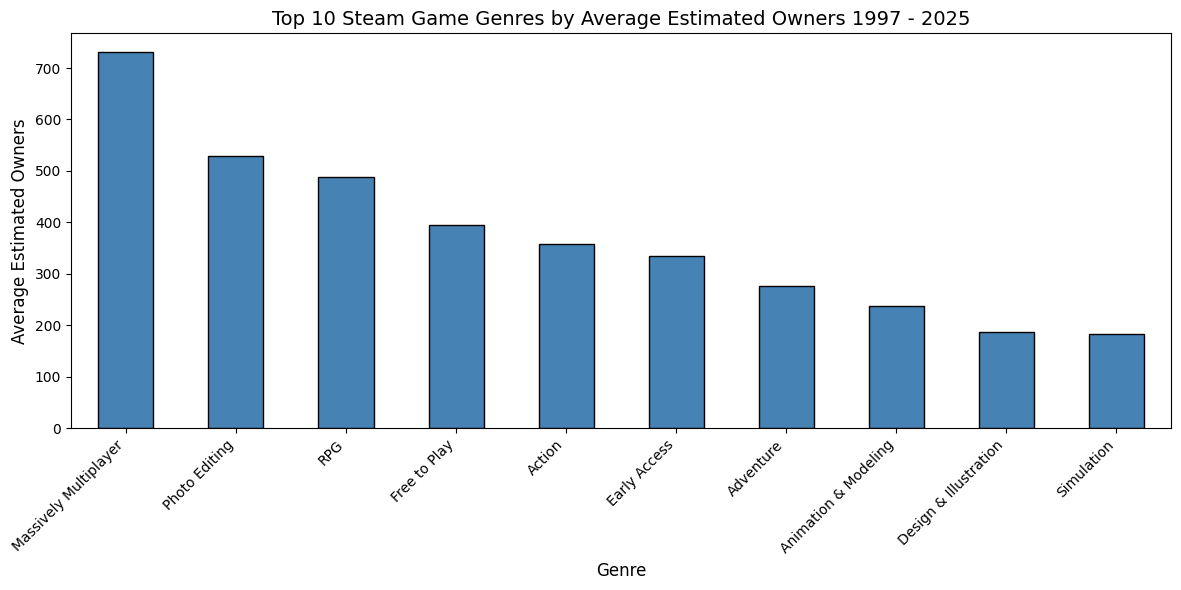

In [14]:
#Plotting for top 10 genres by average estimated owners

#Import Statements
import matplotlib.pyplot as plt

#Plot the top 10 genres by average estimated owners
plt.figure(figsize=(12, 6))
genre_owner_stats.head(10).plot(kind="bar", color="steelblue", edgecolor="black")

#Plot labels and title
plt.title("Top 10 Steam Game Genres by Average Estimated Owners 1997 - 2025", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Estimated Owners", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

#Save the top 10 genres plot as a PNG file
#plt.savefig("top10_genres_estimated_owners.png", dpi=300)

#Show the plot
plt.show()

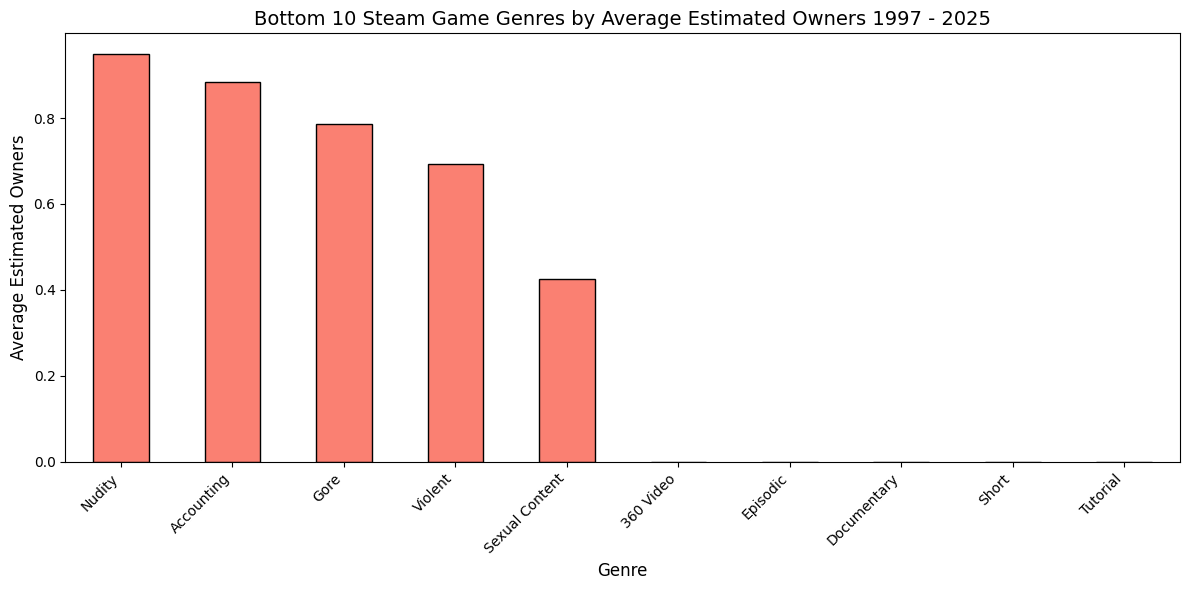

In [15]:
#Plotting for bottom 10 genres by average estimated owners

#Plot the bottom 10 genres by average estimated owners; changed color to salmon
plt.figure(figsize=(12, 6))
genre_owner_stats.tail(10).plot(kind="bar", color="salmon", edgecolor="black")

#Plot labels and title
plt.title("Bottom 10 Steam Game Genres by Average Estimated Owners 1997 - 2025", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Estimated Owners", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

#Save the bottom 10 genres plot as a PNG file
#plt.savefig("bottom10_genres_estimated_owners.png", dpi=300)

#Show the plot
plt.show()

Question 2: Can group Steam games meaningfully based on price, playtime, and review activity? (K-Means cluster)

We will create a new dataframe copy for this as to not disrupt the original. We will only be using price, positive, negative, and average playtime forever.

In [16]:
#Select only the numeric features we want for clustering
question2_df = df[["Price","Positive","Negative","Average playtime forever"]].copy()

#Display first 10 rows
question2_df.head(10)

,Price,Positive,Negative,Average playtime forever
0,0.0,1.040868e-06,0.000012,0.000000
1,0.0,9.194334e-06,0.000006,0.000000
2,0.0,0.000000e+00,0.000000,0.000000
3,0.0,5.204340e-07,0.000000,0.000000
4,0.0,8.673900e-06,0.000009,0.000000
5,0.0,1.509259e-05,0.000055,0.000000
6,0.0,3.643038e-06,0.000008,0.000000
7,0.0,0.000000e+00,0.000000,0.000000
8,0.0,1.318433e-05,0.000007,0.000000
9,0.0,3.903255e-05,0.000050,0.004824


Next, we will deploy k-means clustering using this column list. We will attempt 4 cluster groups.

In [17]:
#Import Statements
from sklearn.cluster import KMeans

#Run KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")

#Fit and assign the cluster labels
question2_df["cluster"] = kmeans.fit_predict(question2_df)

We now have a new column for the clusters using our column list. Now we will visualize using a scatter plot. 

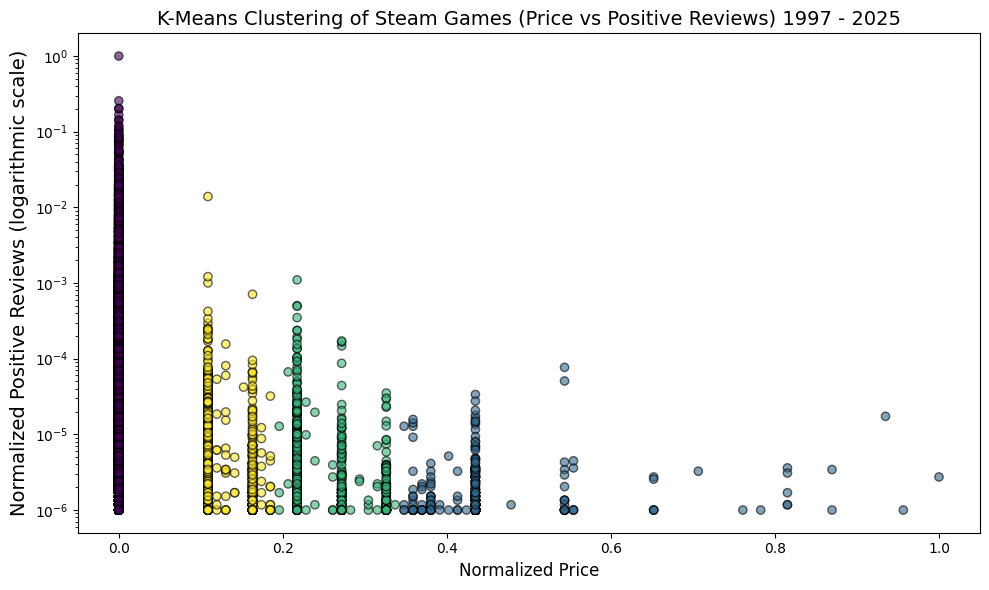

In [18]:
#Figure and axis for the plots
fig, ax = plt.subplots(figsize=(10, 6))

#Add a tiny offset to avoid issues with log(0)
#Was running into problems with log scale and zero values
positive_adj = question2_df["Positive"] + 1e-6

#Create scatter plot using adjusted positive values
scatter = ax.scatter(question2_df["Price"],positive_adj,c=question2_df["cluster"],cmap="viridis",alpha=0.6,edgecolor="k")

#Use log scale on the Y axis for better visibility
ax.set_yscale("log")

#Plot labels and title
ax.set_title("K-Means Clustering of Steam Games (Price vs Positive Reviews) 1997 - 2025", fontsize=14)
ax.set_xlabel("Normalized Price", fontsize=12)
ax.set_ylabel("Normalized Positive Reviews (logarithmic scale)", fontsize=14)

#Set plot layout
plt.tight_layout()

#Save the figure to the working directory
#fig.savefig("kmeans_clusters_price_positive.png", dpi=300)

#Show the plot
plt.show()

I will also create a bar chart to help visualize the cluster sizes. 

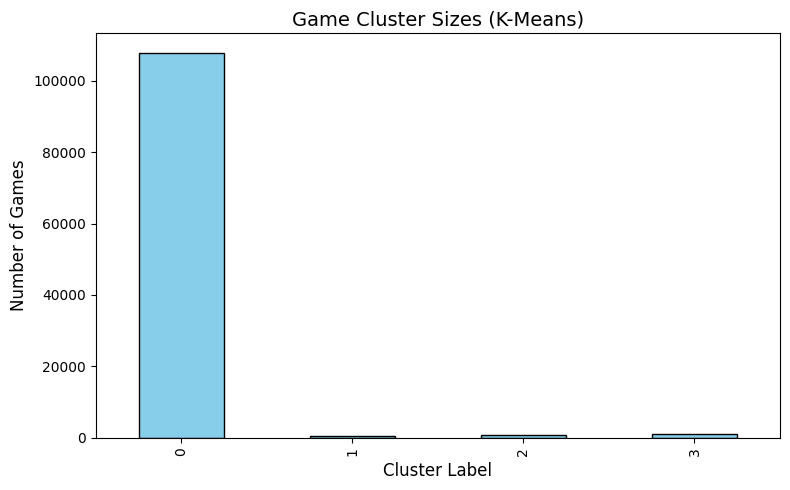

In [23]:
#Count the number of games in each cluster 
cluster_counts = question2_df["cluster"].value_counts().sort_index()

#Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
cluster_counts.plot(kind="bar",ax=ax,color="skyblue",edgecolor="black")

#Bar chart titles and labels
ax.set_title("Game Cluster Sizes (K-Means)", fontsize=14)
ax.set_xlabel("Cluster Label", fontsize=12)
ax.set_ylabel("Number of Games", fontsize=12)

#Plot layout
plt.tight_layout()

#Save the plot to png file
fig.savefig("kmeans_cluster_sizes_bar.png", dpi=300)

#Show the plot
plt.show()

Our k-means show us four general categories of Steam games based on price and engagement. The PURPLE cluster represents very low-priced or free games with very low review counts, reflecting titles with minimal visibility. The BLUE cluster consists of low to mid priced games that show slight but noticeable engagement. The GREEN cluster includes mid priced games with moderate player interaction, typically indie titles with some traction. The YELLOW cluster contains higher priced games with mixed performance. Some premium titles attract strong engagement, while others underperform despite the price. Although the dataset is sparse and really skewed, the four clusters still show meaningful distinctions among different groups of games within the Steam marketplace.

Question 3: Which features correlate most strongly with estimated owners? (Correlation matrix)

Same as previous, we will make a new dataframe copy exclusively for this.

In [20]:
#Create question 3 dataframe copy
question3_df = df[["Estimated owners","Price","Positive","Negative","Reviews","Average playtime forever","Median playtime forever","Recommendations","Achievements"]].copy()

#Fill missing numeric values with 0 just to be safe
question3_df = question3_df.fillna(0)

#Show the first 10 rows
question3_df.head(10)

,Estimated owners,Price,Positive,Negative,Reviews,Average playtime forever,Median playtime forever,Recommendations,Achievements
0,0,0.0,1.040868e-06,0.000012,0.0,0.000000,0.000000,0,30
1,0,0.0,9.194334e-06,0.000006,0.0,0.000000,0.000000,0,12
2,0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0
3,0,0.0,5.204340e-07,0.000000,0.0,0.000000,0.000000,0,0
4,0,0.0,8.673900e-06,0.000009,0.0,0.000000,0.000000,0,17
5,68,0.0,1.509259e-05,0.000055,0.0,0.000000,0.000000,0,0
6,3,0.0,3.643038e-06,0.000008,0.0,0.000000,0.000000,0,62
7,2,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0
8,1,0.0,1.318433e-05,0.000007,0.0,0.000000,0.000000,0,25
9,0,0.0,3.903255e-05,0.000050,0.0,0.004824,0.003751,0,32


Now we will make our correlation matrix:

In [21]:
#Compute correlation matrix
corr_matrix = question3_df.corr()

#Display the correlation matrix
corr_matrix

,Estimated owners,Price,Positive,Negative,Reviews,Average playtime forever,Median playtime forever,Recommendations,Achievements
Estimated owners,1.000000,-0.001608,0.412474,0.356903,NaN,0.091350,0.017146,0.369920,0.005556
Price,-0.001608,1.000000,-0.004234,-0.003714,NaN,-0.010084,-0.006753,-0.004621,-0.003906
Positive,0.412474,-0.004234,1.000000,0.778418,NaN,0.201283,0.035167,0.919155,0.014215
Negative,0.356903,-0.003714,0.778418,1.000000,NaN,0.192835,0.036398,0.805082,0.010062
Reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average playtime forever,0.091350,-0.010084,0.201283,0.192835,NaN,1.000000,0.885542,0.187974,0.015764
Median playtime forever,0.017146,-0.006753,0.035167,0.036398,NaN,0.885542,1.000000,0.041573,0.007530
Recommendations,0.369920,-0.004621,0.919155,0.805082,NaN,0.187974,0.041573,1.000000,0.014240
Achievements,0.005556,-0.003906,0.014215,0.010062,NaN,0.015764,0.007530,0.014240,1.000000


The correlation shows that the strongest predictors of estimated owners are the number of POSITIVE REVIEWS, RECOMMENDATIONS, NEGATIVE REVIEWS. Positive reviews contribute the highest correlation with ownership (0.41), followed by recommendations (0.37) and negative reviews (0.35). This leads us to assume that games with higher engagement, regardless of sentiment, tend to reach greater audiences. Playtime metrics weakly correlate. This suggests that long playtime does not heavily influence game ownership. Price in this dataset shows almost no relationship with owners, meaning that cheaper or more expensive games do not significantly differ in audience size. Overall, user activity through reviews and recommendations is the most reliable indicator of how widely a game is owned.

Now we will create our heatmap for this correlation matrix:

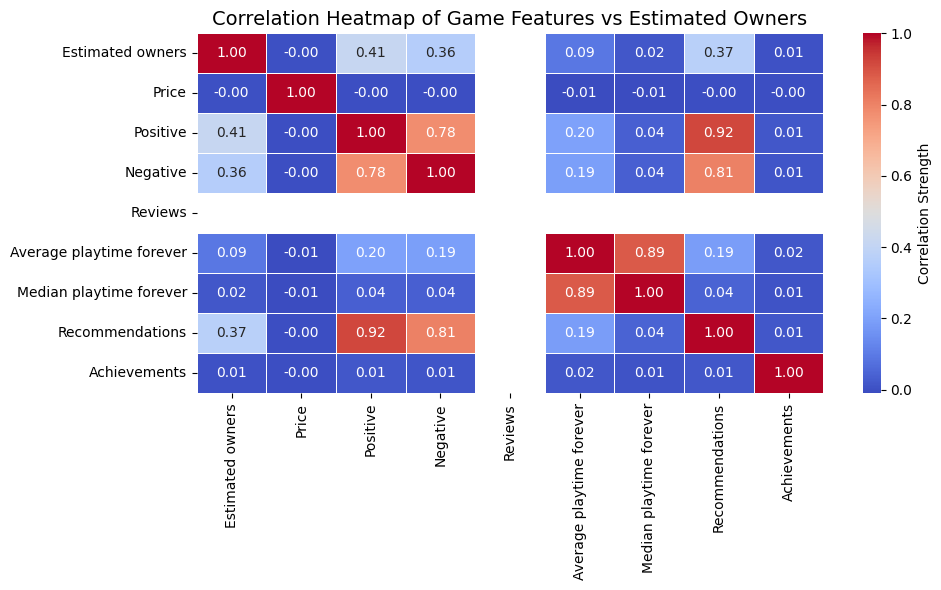

In [22]:
#Import Statements
import seaborn as sns

#Establish our figure size
plt.figure(figsize=(10, 6))

#Create the heatmap
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5,cbar_kws={"label": "Correlation Strength"})

#Plot title
plt.title("Correlation Heatmap of Game Features vs Estimated Owners", fontsize=14)

#Plot layout
plt.tight_layout()

#Save heatmap to working directory
#plt.savefig("question3_correlation_heatmap.png", dpi=300)

#Show the plot
plt.show()

The heatmap gives us a clear visual overview of how each feature relates to estimated owners by using a color scale to represent correlation strength. Stronger, positive correlations are deep red, while negative or weak relationships are in deep blue or light blue. In our heatmap here, the tiles corresponding to positive reviews, recommendations, and negative reviews display the strongest red coloration against the “Estimated owners” row. This further confirms that these engagement-based features are the most influential predictors of game ownership. In contrast to this, features like price, achievements, and playtime appear in pale or neutral colors, showing weak or minimal correlation. This makes it easy for us to distinguish which attributes meaningfully impact Steam game ownership patterns and which contribute little to predicting game popularity.